<a href="https://colab.research.google.com/github/aiyappa02/Finance/blob/master/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Get Tickers in portfolio
assets =['AMZN','FB','NFLX','TSLA','GOOG']

In [5]:
#Assign weight to the stok portfolio
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [6]:
#Get the portfolio starting date
stockStartDate = '2013-01-01'


In [7]:
# Get the stock ending date
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-07-10'

In [9]:
#create a dataframe to stroe the adujusted close price of the stocks
df = pd.DataFrame()

#store the adj close prive of the stock into the df
for stock in assets:
   df[stock]= web.DataReader(stock,data_source='yahoo',start=stockStartDate,end=today)['Adj Close']



In [12]:
df.head()


,AMZN,FB,NFLX,TSLA,GOOG
Date,,,,,
2013-01-02,257.309998,28.000000,13.144286,35.360001,360.274597
2013-01-03,258.480011,27.770000,13.798572,34.770000,360.483826
2013-01-04,259.149994,28.760000,13.711429,34.400002,367.607117
2013-01-07,268.459991,29.420000,14.171429,34.340000,366.003143
2013-01-08,266.380005,29.059999,13.880000,33.680000,365.280823


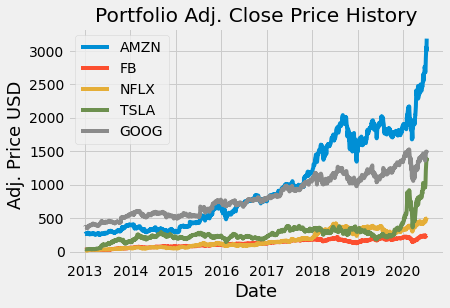

In [14]:
#visually shw the stock
title ="Portfolio Adj. Close Price History"

#get the stocks
my_stocks =df
 
#create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label =c)

plt.title(title)
plt.xlabel('Date', fontsize =18)
plt.ylabel('Adj. Price USD', fontsize =18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()


In [17]:
#show daily simple returns
returns = df.pct_change()
returns.head()


,AMZN,FB,NFLX,TSLA,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.004547,-0.008214,0.049777,-0.016686,0.000581
2013-01-04,0.002592,0.035650,-0.006315,-0.010641,0.019760
2013-01-07,0.035925,0.022949,0.033549,-0.001744,-0.004363
2013-01-08,-0.007748,-0.012237,-0.020565,-0.019220,-0.001974


In [18]:
#create and show the annualised covariance matrix
# 252 = no of trading days in ayear
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,AMZN,FB,NFLX,TSLA,GOOG
AMZN,0.092014,0.052387,0.061485,0.052658,0.046659
FB,0.052387,0.116836,0.054747,0.056047,0.049172
NFLX,0.061485,0.054747,0.212057,0.070046,0.048898
TSLA,0.052658,0.056047,0.070046,0.294782,0.045181
GOOG,0.046659,0.049172,0.048898,0.045181,0.065010


In [19]:
#calculate the portfolio variance
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.07421035283332017

In [20]:
#calc the portfolio std dev
port_stddev= np.sqrt(port_variance)
port_stddev


0.27241577199809885

In [22]:
#calc annuaal portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.43514846108302074

In [23]:
#Show the expected annual Retuen, 

percent_var = str( round(port_variance, 2) * 100)+"%"
percent_vola=str(round(port_stddev, 2)* 100) + '%'
percent_ret= str(round(portfolioSimpleAnnualReturn,2) *100) + "%"

print ('Expected annual return '+ percent_ret)
print ('Annual volatility/risk '+ percent_vola)
print ('Annual variance '+ percent_var)

Expected annual return 44.0%
Annual volatility/risk 27.0%
Annual variance 7.000000000000001%


In [26]:
pip install PyPortfolioOpt


     |████████████████████████████████| 51kB 3.1MB/s 


In [29]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [32]:
# Portfolio Optimization
#calculate the expected returns and the annualized sample covariance matrix of asset retuens
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max sharpe ratio.(The ratio describes how much excess return you receive for the extra volatility you endure for holding a riskier asset.)
ef = EfficientFrontier(mu, S)
weights1 = ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AMZN', 0.33499), ('FB', 0.12304), ('NFLX', 0.30051), ('TSLA', 0.24147), ('GOOG', 0.0)])
Expected annual return: 50.1%
Annual volatility: 30.2%
Sharpe Ratio: 1.59


(0.5008578170259346, 0.30198059122411547, 1.5923467633357438)

In [33]:
0.33499+0.12304+0.30051+0.24147

1.00001

In [35]:
#get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices= get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation ,leftover = da.lp_portfolio()
print('Discrete aloocation :', allocation)
print('Funds remaining : ${:.2f}'.format(leftover))



Discrete aloocation : {'AMZN': 2.0, 'FB': 7.0, 'NFLX': 8.0, 'TSLA': 2.0}
Funds remaining : $72.60
